In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
df_indices = pd.read_feather('Indices.feather')
df_indices = df_indices.set_index('Fecha')
df_indices.head()

('Precio', 'CCO')  ('Precio', 'DAX')  ('Precio', 'GENERAL')  \
Fecha                                                                     
2016-12-01            5251.11           10534.05              742517.64   
2016-12-02            5255.65           10513.35              741135.06   
2016-12-05            5308.89           10684.83              740531.89   
2016-12-06            5333.00           10775.32              746463.91   
2016-12-07            5393.76           10986.69              746557.54   

            ('Precio', 'IBOV')  ('Precio', 'INCH-GB')  ('Precio', 'INSP-GB')  \
Fecha                                                                          
2016-12-01            59506.53                3273.31                 8669.2   
2016-12-02            60316.13                3243.84                 8607.1   
2016-12-05            59831.72                3204.71                 8664.7   
2016-12-06            61088.24                3199.65                 8893.3   
2016-12-07            61414.40                3222.24                 8960.4   

            ('Precio', 'IPSA')  ('Precio', 'MERVAL')  ('Precio', 'MERVAL25')  \
Fecha                                                                          
2016-12-01             4197.48              17041.98                18403.79   
2016-12-02             4202.98              16947.76                18296.47   
2016-12-05             4206.44              16999.02                18347.67   
2016-12-06             4214.38              17235.21                18600.82   
2016-12-07             4224.67              17196.77                18561.06   

            ('Precio', 'NDX')  ('Precio', 'mcx')  
Fecha                                             
2016-12-01            4734.10            2121.87  
2016-12-02            4739.37            2128.99  
2016-12-05            4778.14            2158.33  
2016-12-06            4788.67            2152.35  
2016-12-07            4851.94            2160.51

In [3]:
df_divisas = pd.read_feather('Divisas.feather')
df_divisas = df_divisas.set_index('Fecha')
df_divisas.head()

('Precio', 'ARS')  ('Precio', 'BRL')  ('Precio', 'UYU')
Fecha                                                              
2016-11-28              15.49               3.41              29.02
2016-11-29              15.67               3.45              29.00
2016-11-30              15.85               3.41              28.95
2016-12-01              15.80               3.58              28.93
2016-12-02              15.92               3.48              28.90

In [22]:
df = df_divisas.join(   df_indices,
                    how='left',
                    )


In [24]:
df.head()

('Precio', 'ARS')  ('Precio', 'BRL')  ('Precio', 'UYU')  \
Fecha                                                                 
2016-11-28              15.49               3.41              29.02   
2016-11-29              15.67               3.45              29.00   
2016-11-30              15.85               3.41              28.95   
2016-12-01              15.80               3.58              28.93   
2016-12-02              15.92               3.48              28.90   

            ('Precio', 'CCO')  ('Precio', 'DAX')  ('Precio', 'GENERAL')  \
Fecha                                                                     
2016-11-28                NaN                NaN                    NaN   
2016-11-29                NaN                NaN                    NaN   
2016-11-30                NaN                NaN                    NaN   
2016-12-01            5251.11           10534.05              742517.64   
2016-12-02            5255.65           10513.35              741135.06   

            ('Precio', 'IBOV')  ('Precio', 'INCH-GB')  ('Precio', 'INSP-GB')  \
Fecha                                                                          
2016-11-28                 NaN                    NaN                    NaN   
2016-11-29                 NaN                    NaN                    NaN   
2016-11-30                 NaN                    NaN                    NaN   
2016-12-01            59506.53                3273.31                 8669.2   
2016-12-02            60316.13                3243.84                 8607.1   

            ('Precio', 'IPSA')  ('Precio', 'MERVAL')  ('Precio', 'MERVAL25')  \
Fecha                                                                          
2016-11-28                 NaN                   NaN                     NaN   
2016-11-29                 NaN                   NaN                     NaN   
2016-11-30                 NaN                   NaN                     NaN   
2016-12-01             4197.48              17041.98                18403.79   
2016-12-02             4202.98              16947.76                18296.47   

            ('Precio', 'NDX')  ('Precio', 'mcx')  
Fecha                                             
2016-11-28                NaN                NaN  
2016-11-29                NaN                NaN  
2016-11-30                NaN                NaN  
2016-12-01            4734.10            2121.87  
2016-12-02            4739.37            2128.99

In [38]:
df_col = df.dropna()

In [39]:
import pandas_profiling

In [40]:
df_col.profile_report()

# MACHINE LEARNING

In [41]:
y=df_col["('Precio', 'ARS')"] #Me quedo con la columna objetivo

X=df_col.drop(["('Precio', 'ARS')"],axis=1) #Me quedo sin la columna objetivo

In [46]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                random_state=42,
                                                shuffle=False,
                                                train_size=0.8,
                                                )

In [47]:
ytrain.shape

(620,)

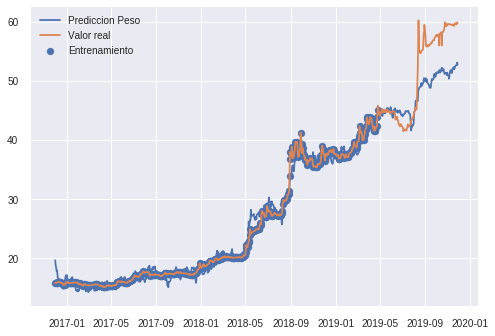

In [48]:
from sklearn.linear_model import LinearRegression # 1. choose model class
model = LinearRegression(fit_intercept=True) # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(X)             # 4. predict on new data

plt.plot(X.index, y_model, label='Prediccion Peso')
plt.plot(y, label='Valor real')
plt.scatter(Xtrain.index, ytrain, label='Entrenamiento')
plt.legend()

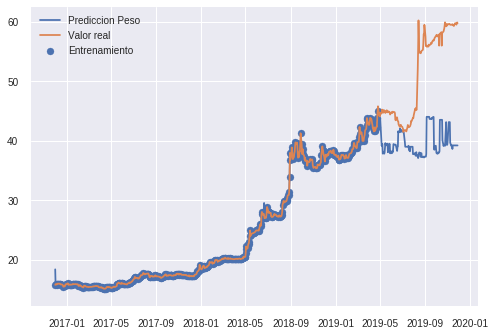

In [49]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(10)
forest.fit(Xtrain, ytrain)
y_model = forest.predict(X)

plt.plot(X.index, y_model, label='Prediccion Peso')
plt.plot(y, label='Valor real')
plt.scatter(Xtrain.index, ytrain, label='Entrenamiento')
plt.legend()